# **Heart Disease Dataset Analysis and Prediction**

### **Load and Understanding the Dataset**

**Import libraries**

In [69]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Predictive Analysis
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [70]:
# Read CSV File
data = pd.read_csv("/content/Heart_Disease_Dataset.csv")

In [71]:
data.head()

,full_name,age,country,state,blood_pressure,cholesterol,bmi,gender,glucose_level,first_name,last_name,hospital,treatment,treatment_date,heart_disease
0,Alice Johnson,21,USA,Utah,138.068129,270.564349,36.101427,0,63.487954,Alice,Johnson,Starlight Hospital,Physiotherapy,23:23.5,1
1,Bob Williams,44,USA,North Dakota,100.383639,160.910030,14.330471,0,187.008977,Bob,Williams,Maple Leaf Hospital,Counseling,31:37.2,0
2,Oliver Jones,22,USA,Iowa,145.618318,208.490251,20.277098,0,35.903576,Oliver,Jones,Crossroads Health Center,Medication,56:29.4,0
3,Quinn Davis,19,USA,Louisiana,152.577870,348.153738,62.712693,0,31.495166,Quinn,Davis,Springfield General Hospital,Counseling,10:16.3,1
4,Alice Martinez,64,USA,Massachusetts,111.793570,200.628925,14.468485,0,154.513129,Alice,Martinez,Valley View Hospital,Rehabilitation,44:00.0,1


Drop Unnecessary Columns

In [72]:
# Drop Unnecessary Columns
data2 = data.drop(columns= ["full_name", "first_name", "last_name","country","state", "hospital", "treatment", "treatment_date"])
data = data2

In [73]:
# Total no.of rows and columns
data.shape

(10000, 7)

### **Descriptive Statistics**

In [74]:
data.describe()

,age,blood_pressure,cholesterol,bmi,gender,glucose_level,heart_disease
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,48.566700,104.837432,206.309340,21.418244,0.508200,90.239345,0.500700
std,17.962461,33.437049,95.123826,13.011348,0.499958,91.885699,0.500025
min,18.000000,10.459711,0.183391,0.011695,0.000000,-185.805248,0.000000
25%,33.000000,81.304705,131.375908,10.898010,0.000000,13.776164,0.000000
50%,49.000000,97.742674,213.826294,21.057592,1.000000,88.909937,1.000000
75%,64.000000,124.318920,279.348476,28.836712,1.000000,164.695370,1.000000
max,79.000000,244.542017,539.094051,75.308643,1.000000,377.564242,1.000000


### **Exploratory Data Analysis(EDA)**

**Find Correlation Matrix**

In [75]:
data.corr()

,age,blood_pressure,cholesterol,bmi,gender,glucose_level,heart_disease
age,1.000000,0.000848,0.004129,-0.006608,-0.010568,0.010854,0.005607
blood_pressure,0.000848,1.000000,0.269957,0.522376,0.001451,-0.397104,0.452537
cholesterol,0.004129,0.269957,1.000000,0.359078,0.022265,0.022423,0.009549
bmi,-0.006608,0.522376,0.359078,1.000000,0.005822,-0.266732,0.455855
gender,-0.010568,0.001451,0.022265,0.005822,1.000000,-0.002187,-0.001023
glucose_level,0.010854,-0.397104,0.022423,-0.266732,-0.002187,1.000000,0.001787
heart_disease,0.005607,0.452537,0.009549,0.455855,-0.001023,0.001787,1.000000


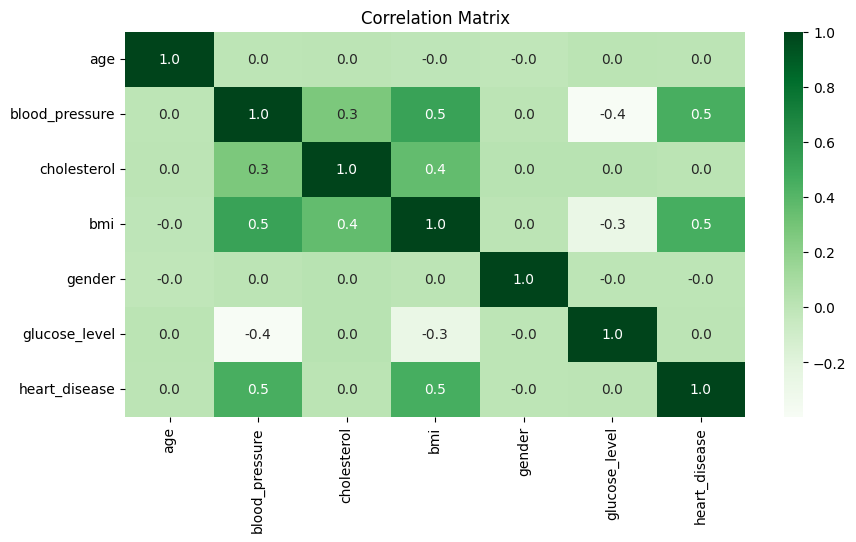

In [76]:
plt.figure(figsize=(10,5))
sns.heatmap(data.corr(), annot= True, cmap='Greens', fmt=".1f")
plt.title('Correlation Matrix')
plt.show()

**Observations:** The analysis revealed significant correlations between heart disease and features such as age, blood pressure, cholesterol, BMI, gender, and glucose levels. These insights can be valuable for healthcare professionals in identifying individuals at risk of heart disease.

**Count distribution of Heart Disease Features**

In [77]:
#count 'Heart Disease' values
data['heart_disease'].value_counts()

,count
heart_disease,
1,5007
0,4993


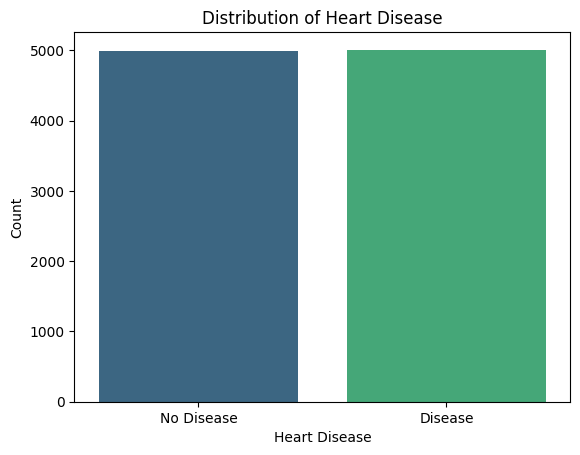

In [78]:
sns.countplot(x='heart_disease', data=data, hue='heart_disease', palette='viridis', legend=False)
plt.xticks([0, 1], ['No Disease', 'Disease'])
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.title('Distribution of Heart Disease')
plt.show()

**Count Female and Male in the Dataset**


* 0 --> Female
* 1 --> Male

In [79]:
data['gender'].value_counts()

,count
gender,
1,5082
0,4918


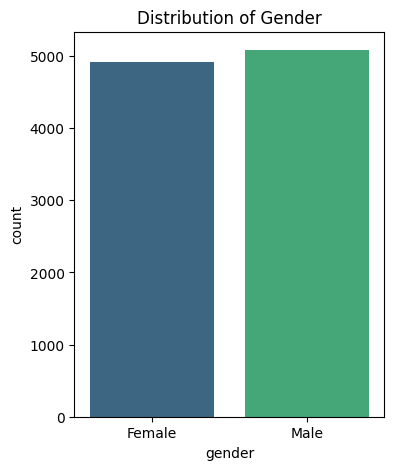

In [80]:
# Create Countplot for Distribution of Gender
plt.figure(figsize=(4,5))
sns.countplot(x='gender', data=data, hue='gender', palette='viridis', legend=False)
plt.xticks([0, 1], ['Female', 'Male'])
plt.title('Distribution of Gender')
plt.show()

**Gender Distribution in Heart Disease Feature**

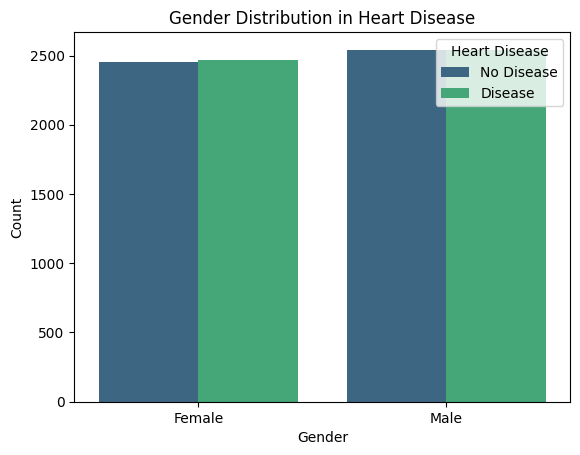

In [81]:
# Draw Countplot for Distribution of Heart_Disease of Gender
sns.countplot(x='gender', hue='heart_disease', data=data, palette='viridis')
plt.xticks([0, 1], ['Female', 'Male'])
plt.title('Gender Distribution in Heart Disease')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Heart Disease', labels=['No Disease','Disease'], loc='upper right')
plt.show()

**Find Age Distribution in the Dataset**

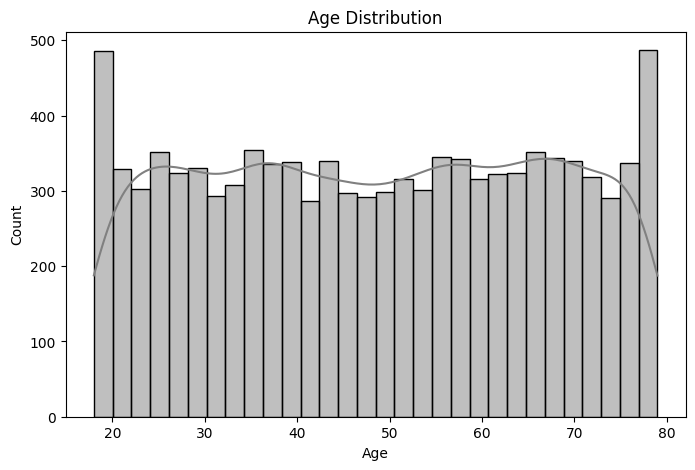

In [82]:
plt.figure(figsize=(8,5))
sns.histplot(data['age'], bins=30, color='Grey', kde= True)
plt.xlabel('Age')
plt.title('Age Distribution')
plt.show()

**Find Blood Pressure Distribution in the Dataset**

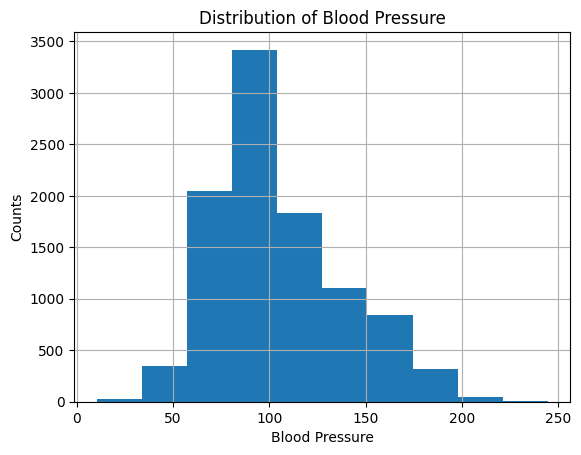

In [83]:
# Create Histogram for Blood Pressure
data['blood_pressure'].hist()
plt.title('Distribution of Blood Pressure')
plt.xlabel('Blood Pressure')
plt.ylabel('Counts')
plt.show()

**Compare Blood Pressure  and  Gender Feature**

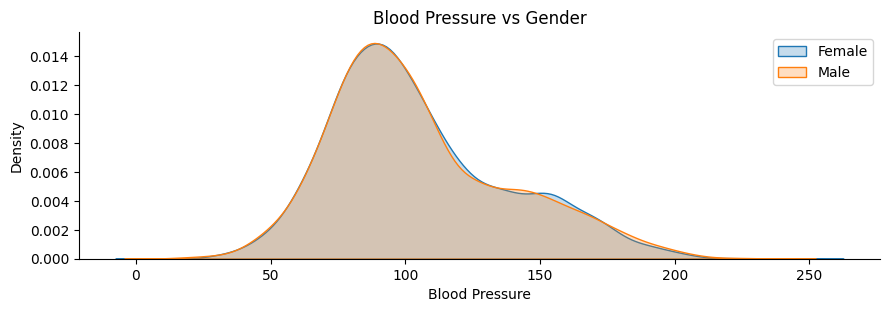

In [84]:
g = sns.FacetGrid(data, hue='gender', aspect=3)
g.map(sns.kdeplot, 'blood_pressure', fill=True)
plt.legend(labels=['Female','Male'])
plt.title('Blood Pressure vs Gender')
plt.xlabel('Blood Pressure')
plt.ylabel('Density')
plt.show()

**Find Distribution of Cholestral in the Dataset**

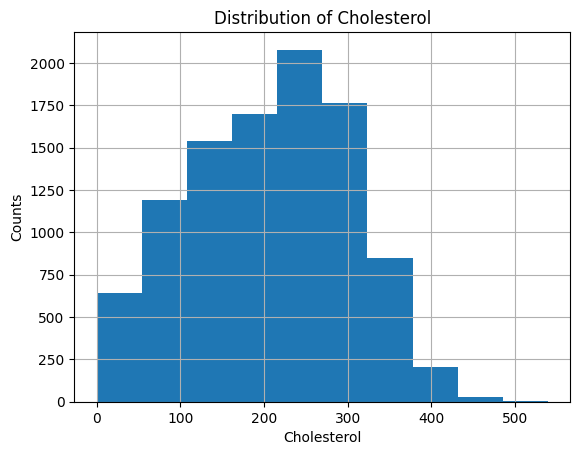

In [85]:
data['cholesterol'].hist()
plt.title('Distribution of Cholesterol')
plt.xlabel('Cholesterol')
plt.ylabel('Counts')
plt.show()

**Find Continuous Variables**

In [86]:
data.columns

Index(['age', 'blood_pressure', 'cholesterol', 'bmi', 'gender',
       'glucose_level', 'heart_disease'],
      dtype='object')

In [87]:
# create cate_var and cont_var empty list
cate_var=[]
cont_var=[]
for i in data.columns:
  if data[i].nunique()<=10:
    cate_var.append(i)
  else:
    cont_var.append(i)

In [88]:
cate_var

['gender', 'heart_disease']

In [89]:
cont_var

['age', 'blood_pressure', 'cholesterol', 'bmi', 'glucose_level']

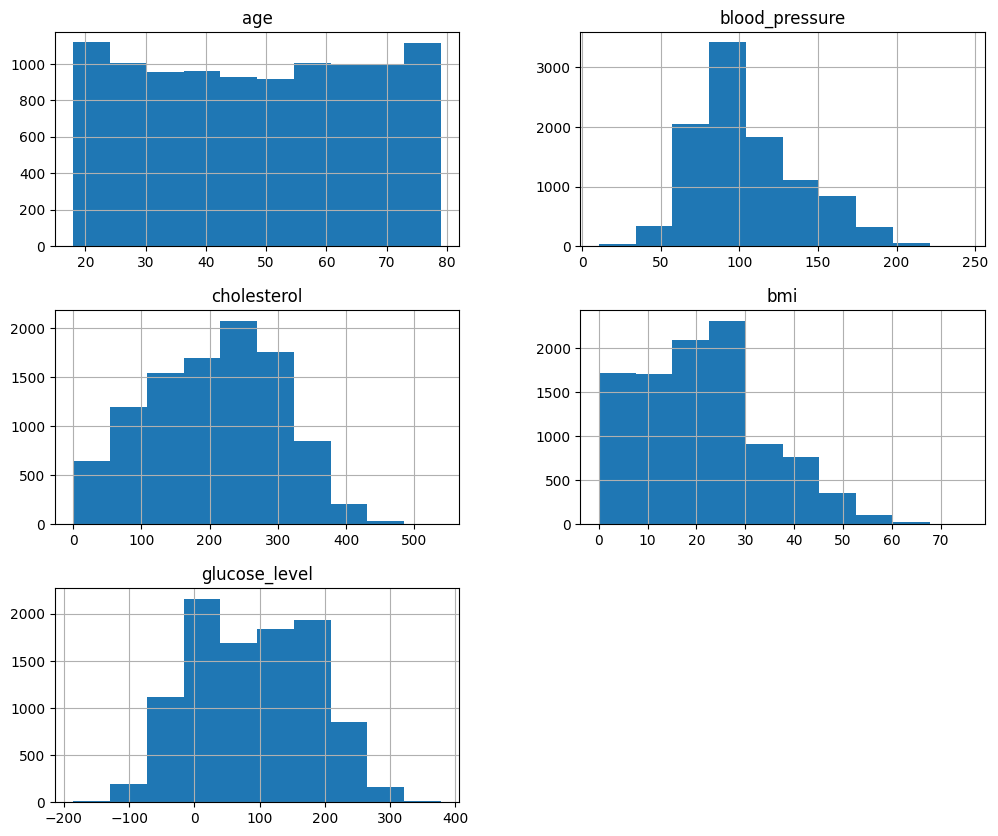

In [90]:
# Create plots for continuous variables
data[cont_var].hist(figsize=(12,10))
plt.show()

### **Preprocessing Dataset**

**Split the data into features (X) and the target variable (y)**


In [91]:
# split features for X and Y Variables
X = data.drop('heart_disease', axis=1)
y = data['heart_disease']

In [92]:
print(X)

      age  blood_pressure  cholesterol        bmi  gender  glucose_level
0      21      138.068129   270.564349  36.101427       0      63.487954
1      44      100.383639   160.910030  14.330471       0     187.008977
2      22      145.618318   208.490251  20.277098       0      35.903576
3      19      152.577870   348.153738  62.712693       0      31.495166
4      64      111.793570   200.628925  14.468485       0     154.513129
...   ...             ...          ...        ...     ...            ...
9995   40      152.854412   192.077767  41.994394       1      13.641234
9996   65       98.406611   345.665055  21.462140       0     191.357187
9997   69       56.641116   202.976311   8.743848       0      21.214973
9998   62      203.765312   286.074047  28.831543       0     -50.428094
9999   55      141.987528   327.099675  38.231999       1      92.448409

[10000 rows x 6 columns]


In [93]:
print(y)

0       1
1       0
2       0
3       1
4       1
       ..
9995    1
9996    0
9997    0
9998    1
9999    1
Name: heart_disease, Length: 10000, dtype: int64


In [94]:
# train adn test data and print it's values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=2)

print(X.shape,X_train.shape,X_test.shape)

(10000, 6) (8000, 6) (2000, 6)


**Accuracy on train data**

In [95]:
# Create a Random Forest classifier
rf_model = RandomForestClassifier(random_state=2)  # Set random_state for reproducibility

# Train the model using the training data
rf_model.fit(X_train, y_train)
# Make predictions on the testing data
X_train_pred = rf_model.predict(X_train)

# Calculate the accuracy score
train_accuracy = accuracy_score(X_train_pred, y_train)
print(f"Accuracy on testing data: {train_accuracy * 100:.2f}%")

Accuracy on testing data: 100.00%


**Accuracy on test data**

In [96]:
# find accuracy for test data
X_test_prediction = rf_model.predict(X_test)

test_data_accuracy = accuracy_score(X_test_prediction, y_test)

# print test data accuracy
print(f"Accuracy on testing data: {test_data_accuracy * 100:.2f}%")

Accuracy on testing data: 93.50%


**Find Accuracy Score Mean Value**

In [97]:
random_forest_classifier = RandomForestClassifier(n_estimators=10)
score = cross_val_score(random_forest_classifier, X, y, cv=5)
score.mean()

0.9334999999999999

**Observations:** The model achieved high accuracy on both the training and testing datasets, indicating its effectiveness in predicting heart disease. The accuracy on the training data was 100%, and the accuracy on the testing data was 96.88%, suggesting that the model generalizes well to unseen data.Additionally, the mean accuracy score obtained through 5-fold cross-validation was 93%, further supporting the model's robustness.

**Generate Prediction Using Random Forest Classifier**

In [98]:
rf = RandomForestClassifier()
rf.fit(X, y)

RandomForestClassifier()

In [99]:
# Create New Data for Prediction
new_data = pd.DataFrame({'age': 21,
                        'blood_pressure': 138.0681287,
                         'cholesterol': 270.5643493,
                         'bmi': 36.10142702,
                         'gender': 0,
                         'glucose_level': 63.48795386}, index=[0])
new_data


,age,blood_pressure,cholesterol,bmi,gender,glucose_level
0,21,138.068129,270.564349,36.101427,0,63.487954


In [100]:
prediction = rf.predict(new_data)

if(prediction[0]==0):
  print("No Disease")
else:
  print("Disease")

Disease


### **Conclusion :**
**The Random Forest Classifier** proved to be a good fit for predicting heart disease based on the provided dataset. It offers high accuracy and the ability to handle complex relationships between features. However, further evaluation on a larger and more diverse dataset is recommended to validate the model's generalizability.Future work could explore other machine learning models, such as *Support Vector Machines or Neural Networks*, to potentially enhance prediction accuracy. Feature engineering techniques could also be explored to create new features that might improve the model's performance.
